### Plotting Data chapter

In [1]:
using SQLite, DataFrames, Chain, CSV, StatsBase, CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

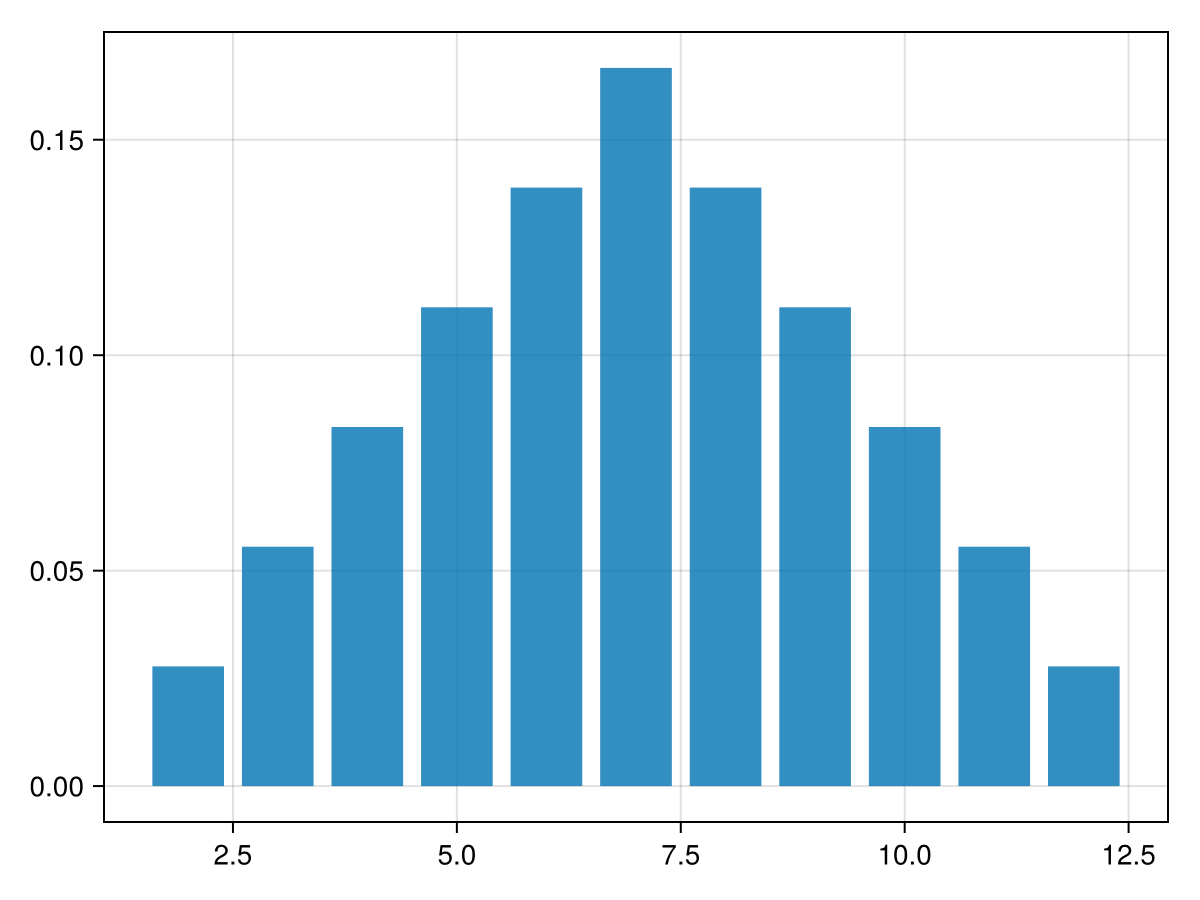

In [6]:
h = [(6-abs(i-7))//36 for i = 2:12]
fig = barplot(2:12,h)

In [9]:
save("../assets/plots/plot-data/dice.png", fig)

CairoMakie.Screen{IMAGE}


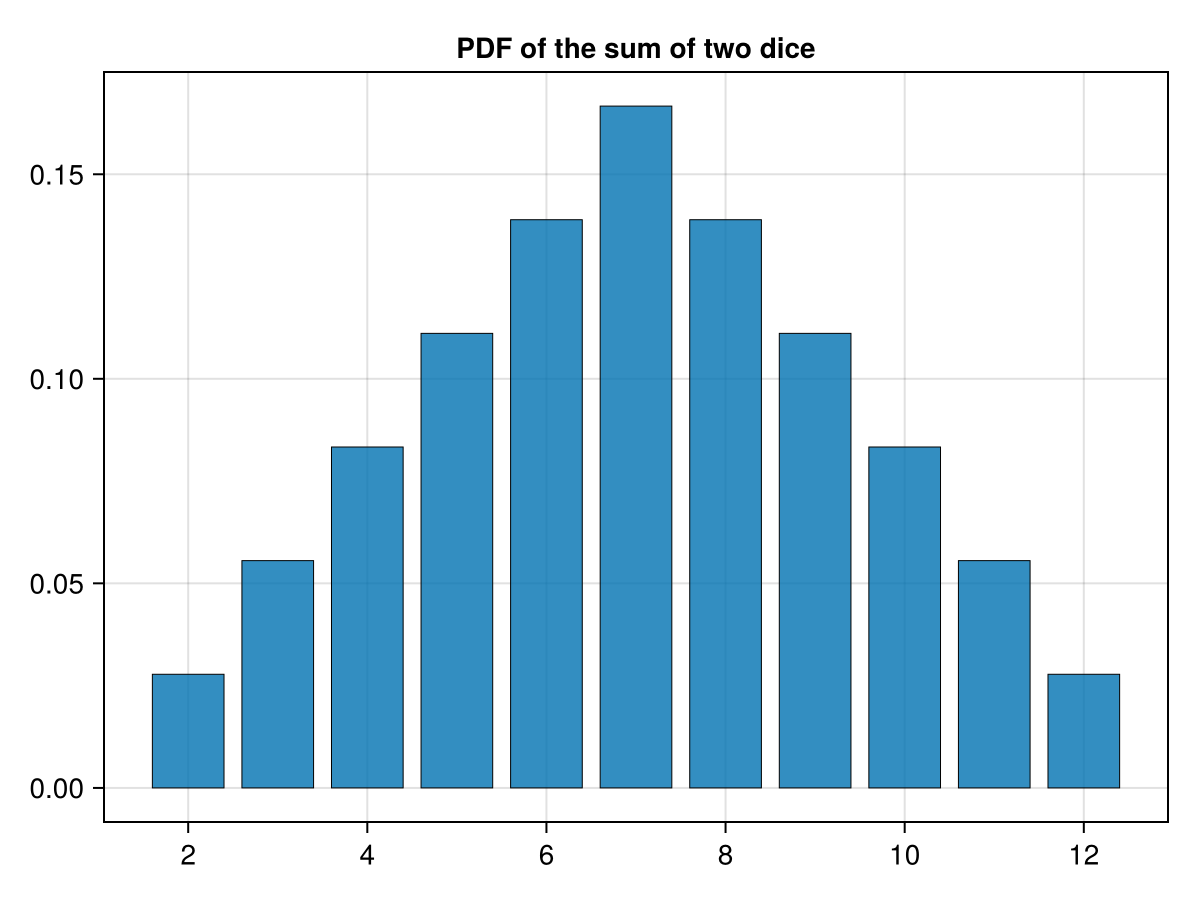

In [13]:
fig = Figure()
ax = Axis(fig[1,1],xticks=2:2:12, title="PDF of the sum of two dice")
barplot!(ax, 2:12,h, strokewidth = 0.5)
fig

In [14]:
save("../assets/plots/plot-data/dice2.png", fig)

CairoMakie.Screen{IMAGE}


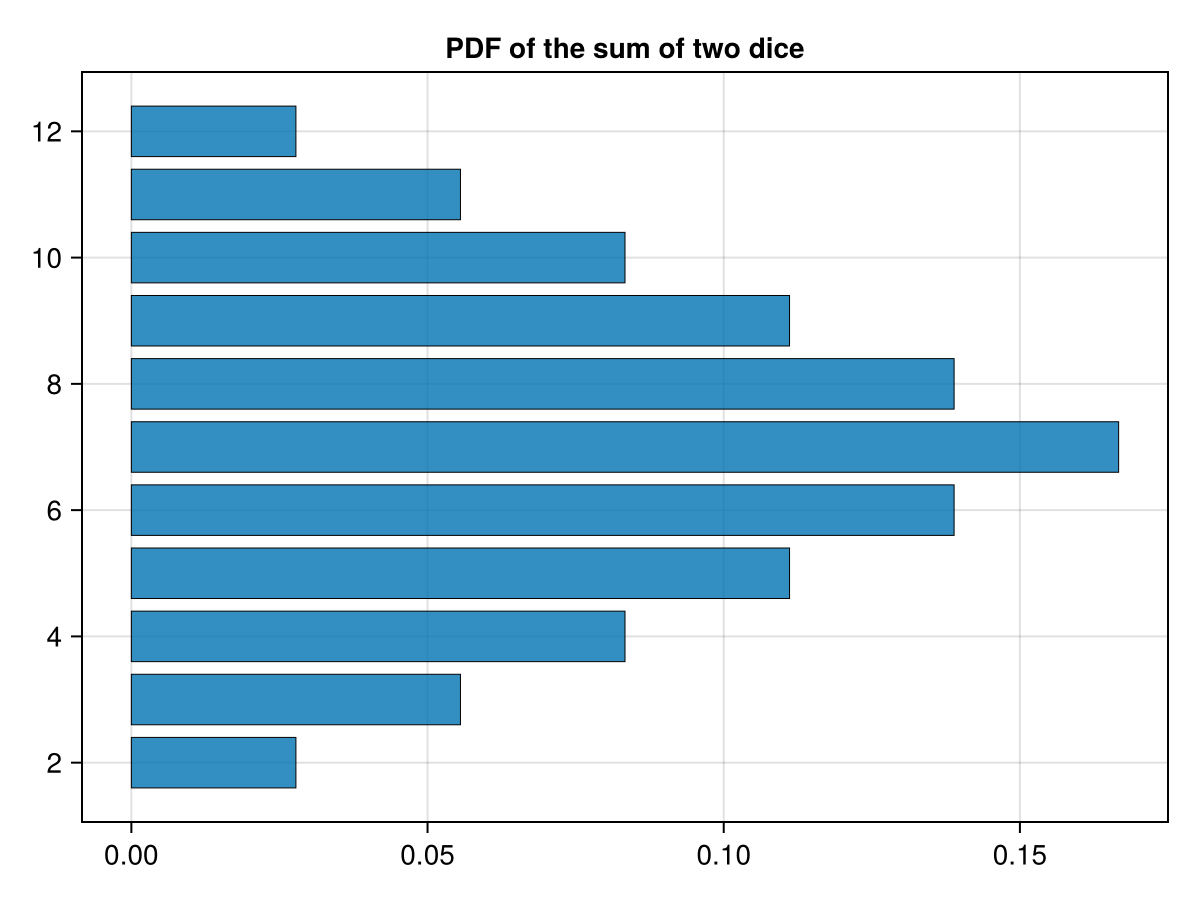

In [ ]:
fig = Figure()
ax = Axis(fig[1,1],yticks=2:2:12, title="PDF of the sum of two dice")
barplot!(ax, 2:12,h, strokewidth = 0.5, direction = :x)
fig

In [17]:
save("../assets/plots/plot-data/dice3.png", fig)

CairoMakie.Screen{IMAGE}


In [ ]:
h = [2, 3, 6, 8, 3, 5, 7, 9]
x = [1, 1, 2, 2, 3, 3, 4, 4]

8-element Vector{Int64}:
 1
 2
 3
 4
 1
 2
 3
 4

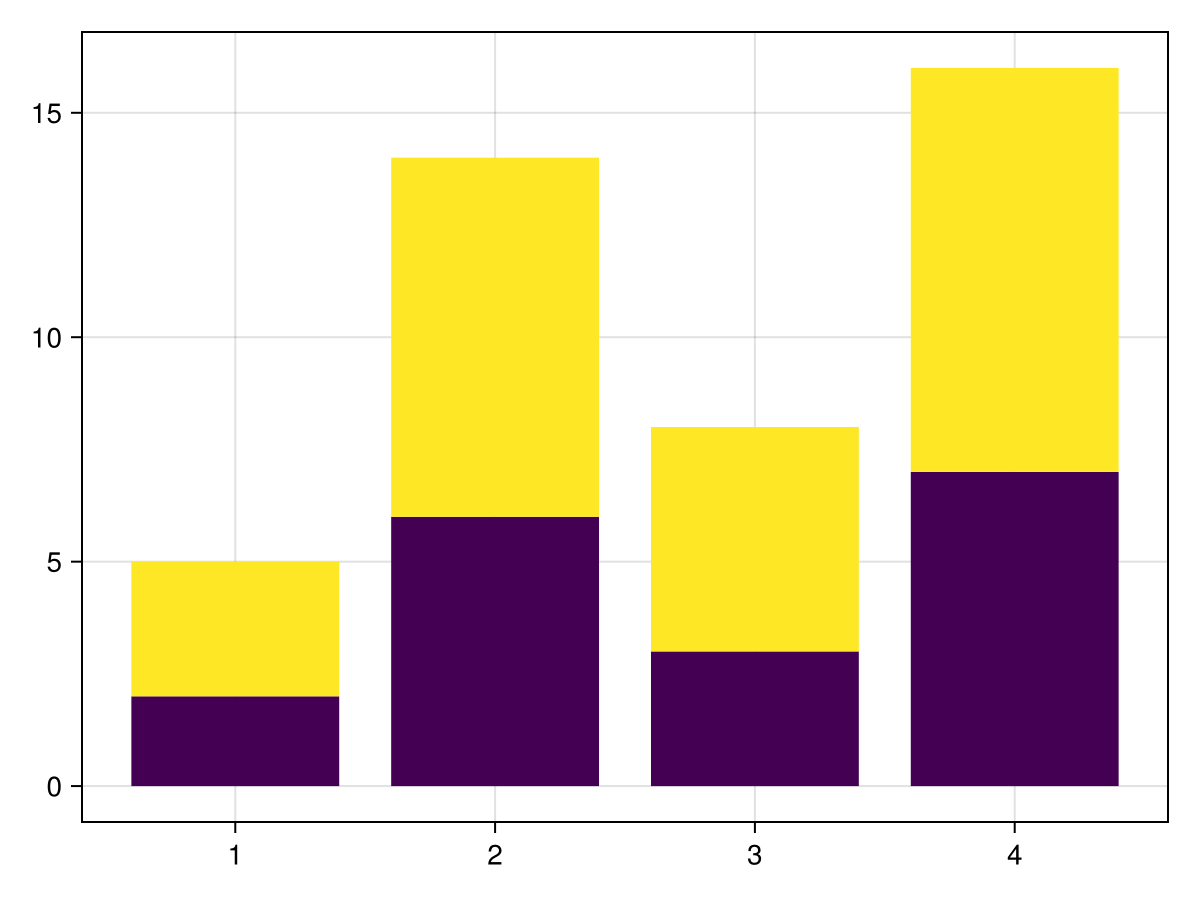

In [29]:
barplot(x,h, stack = [1, 2, 3, 4, 1, 2, 3, 4], color=[1,2,1,2,1,2,1,2])

In [ ]:
db = SQLite.DB("/Users/pstaab/Documents/research/sports/basketball/bb-streaks/nba.sqlite")

SQLite.DB("/Users/pstaab/Documents/research/sports/basketball/bb-streaks/nba.sqlite")

In [ ]:
@chain begin DataFrame(DBInterface.execute(db, """SELECT dates.DATE, home.NAME AS HOME_TEAM, scores.HOME_SCORE, visitor.NAME as VISITOR_NAME, scores.VISITOR_SCORE FROM NBA_GAME_DATES AS dates
  JOIN NBA_SCORES as scores on dates.DATE_ID = scores.DATE_ID
  JOIN NBA_TEAM_NAMES as home ON home.TEAM_ID = scores.HOME_ID
  JOIN NBA_TEAM_NAMES as visitor ON visitor.TEAM_ID = scores.VISITOR_ID
  WHERE dates.SEASON = 2024
  """))
  CSV.write("/Users/pstaab/code/sci-comp-book/julia-output/nba.csv", _)
end

"/Users/pstaab/code/sci-comp-book/julia-output/nba.csv"

In [2]:
nba_scores = CSV.read("nba.csv", DataFrame)

Row,DATE,HOME_TEAM,HOME_SCORE,VISITOR_NAME,VISITOR_SCORE
,Date,String31,Int64,String31,Int64
1,2023-10-24,Denver Nuggets,119,Los Angeles Lakers,107
2,2023-10-24,Golden State Warriors,104,Phoenix Suns,108
3,2023-10-25,Orlando Magic,116,Houston Rockets,86
4,2023-10-25,New York Knicks,104,Boston Celtics,108
5,2023-10-25,Indiana Pacers,143,Washington Wizards,120
6,2023-10-25,Charlotte Hornets,116,Atlanta Hawks,110
7,2023-10-25,Miami Heat,103,Detroit Pistons,102
8,2023-10-25,Toronto Raptors,97,Minnesota Timberwolves,94
9,2023-10-25,Brooklyn Nets,113,Cleveland Cavaliers,114


In [3]:
home_dist = counts(nba_scores.HOME_SCORE,70:160)
visitor_dist = counts(nba_scores.VISITOR_SCORE, 70:160);

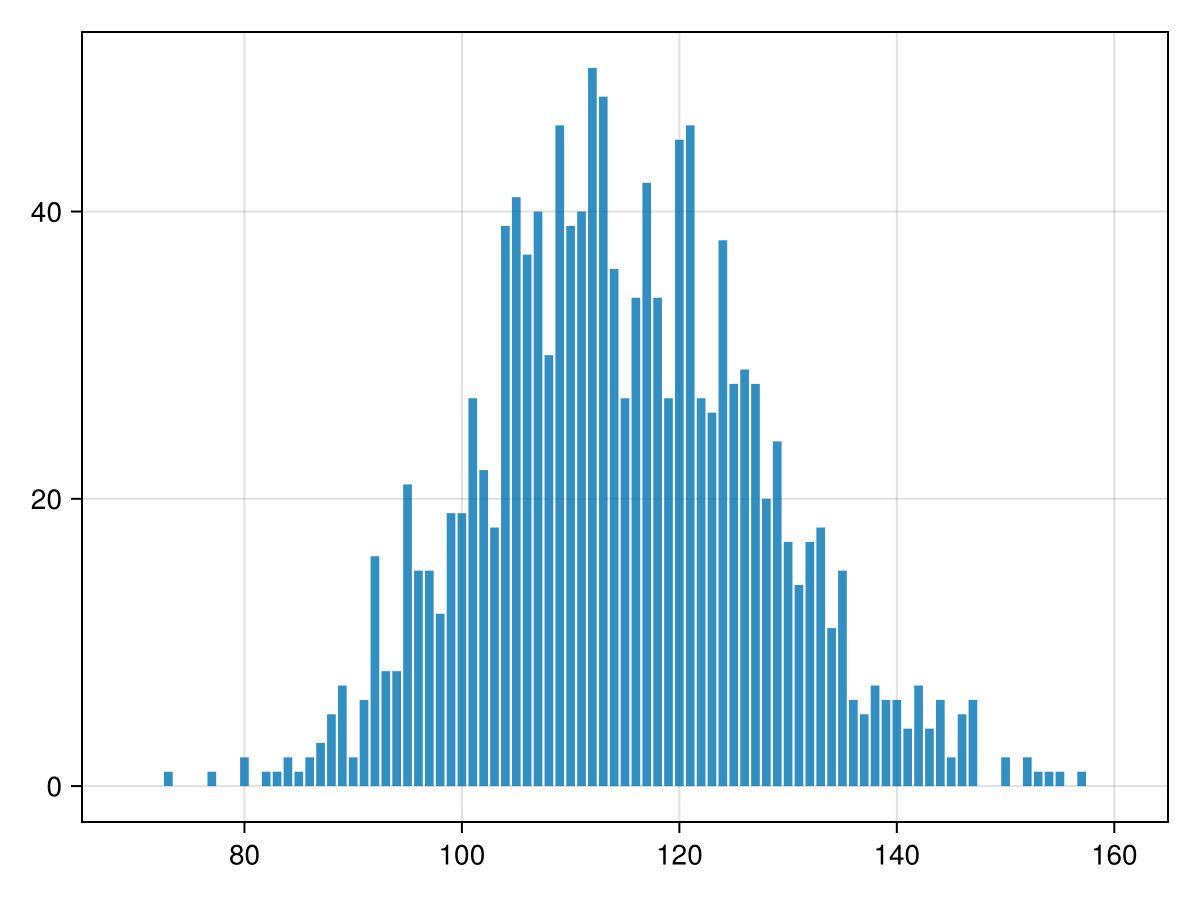

In [6]:
fig = barplot(70:160,home_dist)

In [ ]:
save("../assets/plots/makie/nba_home.png", fig)

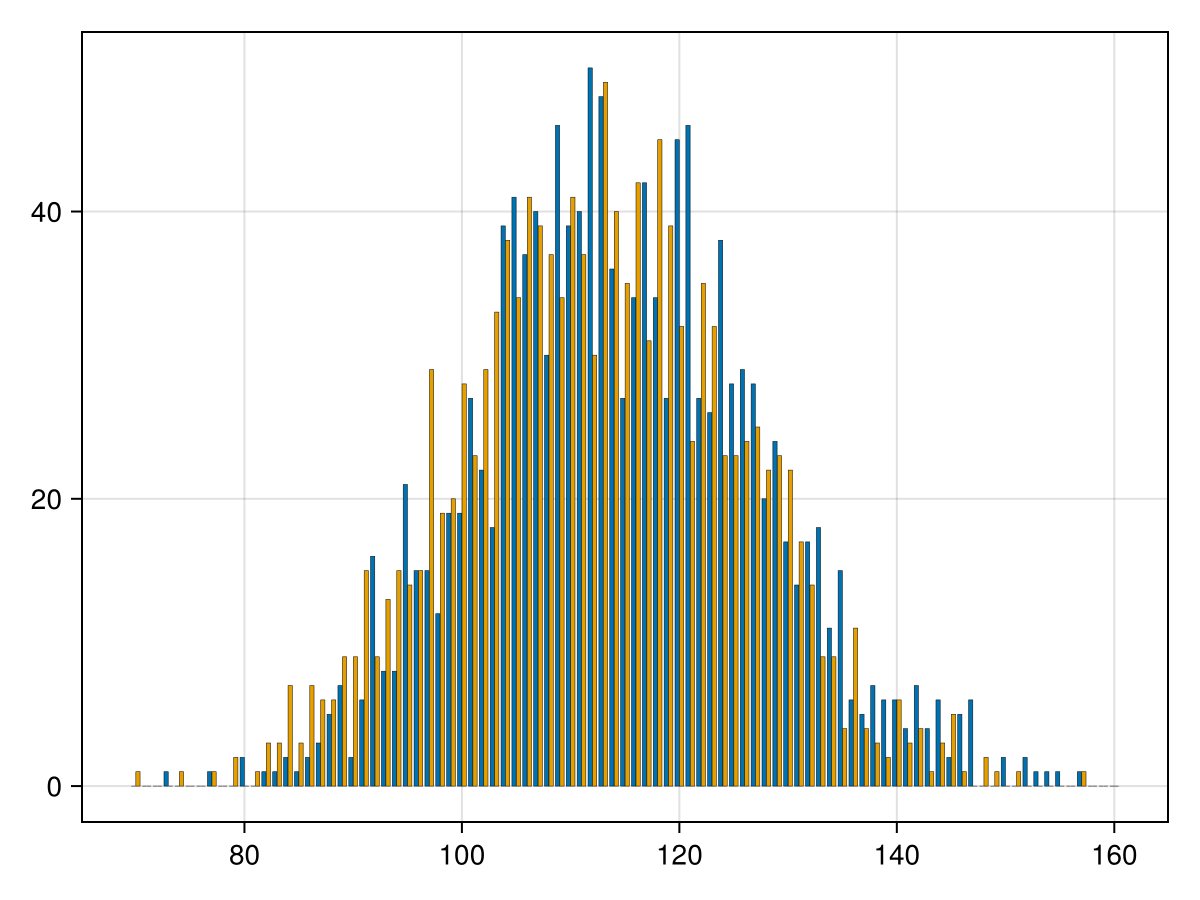

In [12]:
colors = Makie.wong_colors()
fig, ax = barplot(
  repeat(70:160,2),
  vcat(home_dist,visitor_dist),
  dodge = repeat(1:2,inner=91),
  color = repeat(collect(colors[1:2]),inner=91),
  strokewidth=0.25
)

In [14]:
save("../assets/plots/plot-data/nba-compare.png", fig)

CairoMakie.Screen{IMAGE}
